In [1]:
import pandas as pd
import numpy as np 
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LogisticRegression
    from catboost import CatBoostClassifier
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.pipeline import make_pipeline
    from sklearn.metrics import roc_auc_score
    import warnings

    warnings.filterwarnings('ignore')
    %matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\train (1).csv")
test_data = pd.read_csv(r"C:\Users\user\Downloads\test.csv")

In [3]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [4]:
for column in data.columns:
    print(data[column].unique())

[55 72  1 32 60 25 27 50 16 70 69 26 38 30 52 71 59 61  7 20 48 22  2 21
 44 66 58 46 45  5  4  3 62  6 39 68 51 40 10 43 12 35 31 67  8 11 29 37
 33 14 15 47 23 65 13 41 53  9 64 42 34 17 18 63 56 54 24 28 49 19 57 36
  0]
[ 19.5   25.85  75.9  ... 112.25 117.5   98.2 ]
['1026.35' '1872.2' '75.9' ... '55.05' '2215.25' '1375.6']
['Male' 'Female']
[0 1]
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes' 'No phone service']
['No' 'Fiber optic' 'DSL']
['No internet service' 'No' 'Yes']
['No internet service' 'No' 'Yes']
['No internet service' 'No' 'Yes']
['No internet service' 'Yes' 'No']
['No internet service' 'No' 'Yes']
['No internet service' 'No' 'Yes']
['One year' 'Two year' 'Month-to-month']
['No' 'Yes']
['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']
[0 1]


Необходимо изменить форматы: Total Spent должен быть числовой переменной, IsSeniorCitizen - категориальной (1 - Yes, 0 - No)

In [5]:
data.replace(' ', np.nan, inplace=True)
data['TotalSpent'] = data.TotalSpent.fillna(0).astype(float)

In [6]:
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].map({1: 'Yes', 0: 'No'})

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [8]:
test_data.replace(' ', np.nan, inplace=True)
test_data['TotalSpent'] = test_data.TotalSpent.fillna(0).astype(float)
test_data['IsSeniorCitizen'] = test_data['IsSeniorCitizen'].map({1: 'Yes', 0: 'No'})

In [9]:
test_data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [10]:
numeric_columns = ['ClientPeriod', 'MonthlySpending', 'TotalSpent']
categorical_columns = ['Sex',
                       'IsSeniorCitizen',
                       'HasPartner',
                       'HasChild',
                       'HasPhoneService',
                       'HasMultiplePhoneNumbers',
                       'HasInternetService',
                       'HasOnlineSecurityService',
                       'HasOnlineBackup',
                       'HasDeviceProtection',
                       'HasTechSupportAccess',
                       'HasOnlineTV',
                       'HasMovieSubscription',
                       'HasContractPhone',
                       'IsBillingPaperless',
                       'PaymentMethod']

feature_columns = numeric_columns + categorical_columns
target_column = 'Churn'

Посмотрим на распределение числовых и категориальных переменных

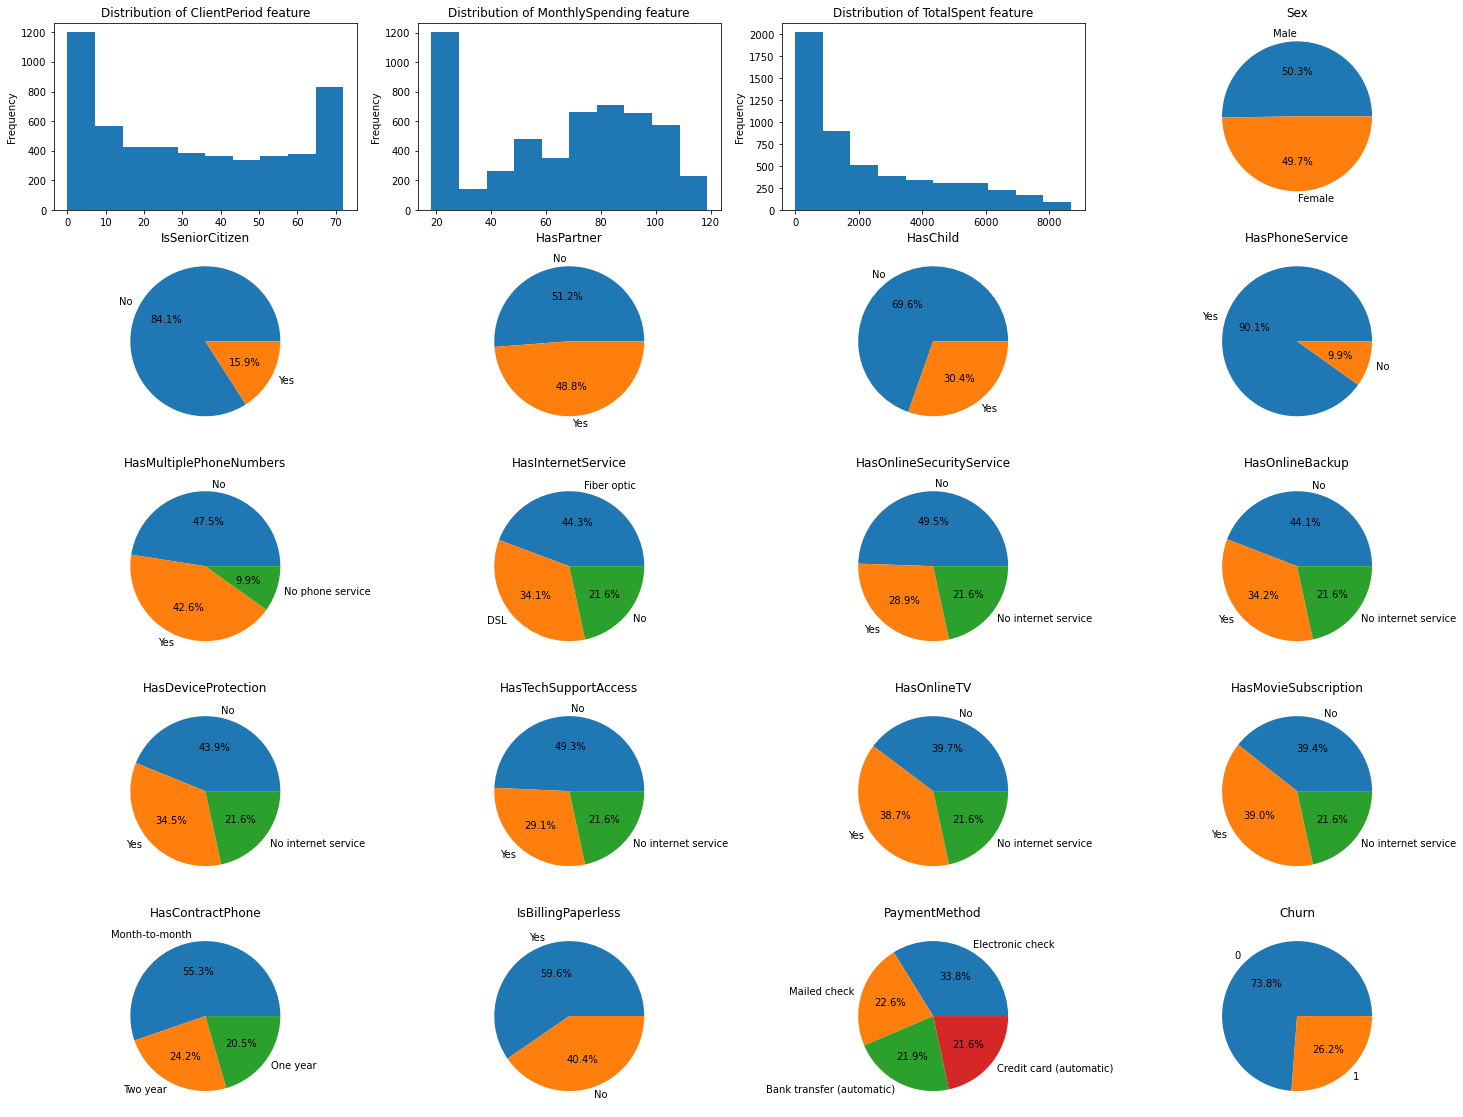

In [11]:
fig, axis = plt.subplots(5, 4, figsize=(25, 20))


for col, ax in zip(data.columns, axis.flatten()):
    if col in numeric_columns:
        data[col].plot(kind='hist', ax=ax)
        ax.set_title('Distribution of ' + str(col) + ' feature')
    else:
        ax.set_title(col)
        ax.pie(data[col].value_counts(), autopct='%1.1f%%', labels=data[col].value_counts().index)
fig.show()

По распределению целевой переменной видим, что классы не сбалансированы, следовательно нельзя использовать метрику Accuracy, стоит использовать ROC-AUC метрику, которая не чувствительна к дисбалансу классов

Разделим данные на тренировочную и валидационную выборку

In [12]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']

In [13]:
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.20,Male,No,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.90,Male,No,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570.00,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [15]:
X_train.shape, X_val.shape

((4225, 19), (1057, 19))

In [16]:
X_origin = data.iloc[:, :-1]

In [17]:
X_origin.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.20,Male,No,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.90,Male,No,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570.00,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [18]:
from sklearn.compose import ColumnTransformer 

Нормируем числовые признаки и закодируем категориальные

In [19]:
transformer = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_columns),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False), categorical_columns)
], remainder='passthrough')

pipeline = make_pipeline(transformer, LogisticRegression(random_state=42, max_iter=1000))


подбираем гиперпараметры

In [20]:
params = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]}

In [21]:
grid_search = GridSearchCV(pipeline, params, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False)

In [22]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'logisticregression__C': 100}
0.8488276348405233


In [23]:
proba_train = grid_search.predict_proba(X_train)[:, 1]
proba_val = grid_search.predict_proba(X_val)[:, 1]

In [24]:
from sklearn.metrics import roc_curve

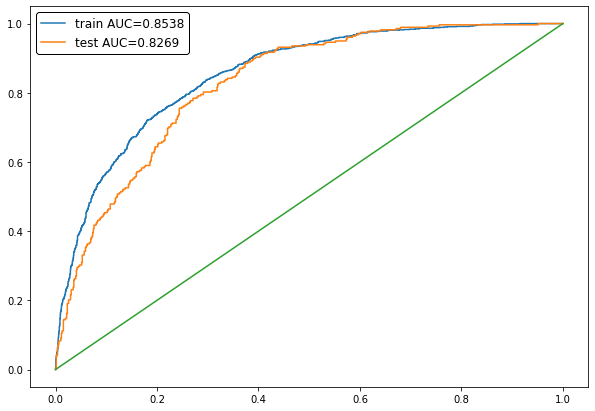

In [25]:
train_auc = roc_auc_score(y_train, proba_train)
test_auc = roc_auc_score(y_val, proba_val)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, proba_train)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_val, proba_val)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))


На тесте получили не самый хороший результат test AUC = 0.8269

Протестируем как работает модель Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [28]:
transformer_new = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_columns),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False), categorical_columns)
], remainder='passthrough')

In [29]:
pipeline_forest = make_pipeline(transformer_new, RandomForestClassifier(random_state=123))

In [30]:
forest_params = {'randomforestclassifier__max_depth': range(1,10,1),
                 'randomforestclassifier__max_features': [None, "sqrt", "log2"],
                 'randomforestclassifier__n_estimators': [100, 150, 200],
                 'randomforestclassifier__min_samples_leaf': range(2,8,1),
                 'randomforestclassifier__min_samples_split': [3,5,10]}

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
forest_CV = RandomizedSearchCV(pipeline_forest, forest_params, cv=5, random_state=23, scoring='roc_auc', n_iter=15)

In [33]:
forest_CV.fit(X_train, y_train)
print(forest_CV.best_params_)
print(forest_CV.best_score_)

{'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 6, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 8}
0.8484028655764636


In [34]:
forest_proba_train = forest_CV.predict_proba(X_train)[:, 1]
forest_proba_val = forest_CV.predict_proba(X_val)[:, 1]

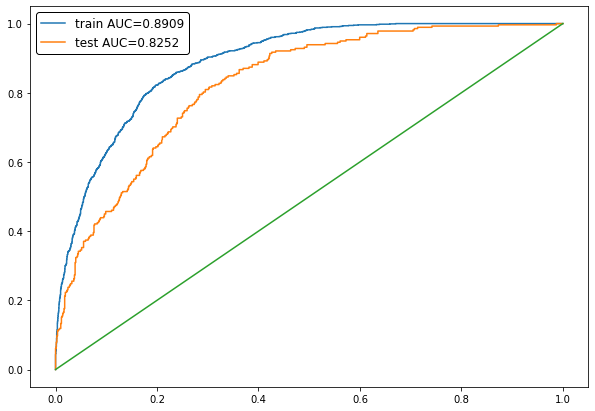

In [35]:
train_auc = roc_auc_score(y_train, forest_proba_train)
test_auc = roc_auc_score(y_val, forest_proba_val)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train,forest_proba_train)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_val, forest_proba_val)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))

На тесте даже получили результат немного хуже чем в логистической регрессии test AUC = 0.8252

Попробуем еще обучить дерево с лучшими подобранными параметрами

In [63]:
forest_new_model = RandomForestClassifier(n_estimators=100, 
                                          min_samples_split=5, 
                                          min_samples_leaf=6, 
                                          max_features='log2', 
                                          max_depth=8)
pipeline_forest_new = make_pipeline(transformer_new, forest_new_model)
pipeline_forest_new.fit(X_train, y_train)
forest_new_proba_train = pipeline_forest_new.predict_proba(X_train)[:, 1]
forest_new_proba_val = pipeline_forest_new.predict_proba(X_val)[:, 1]

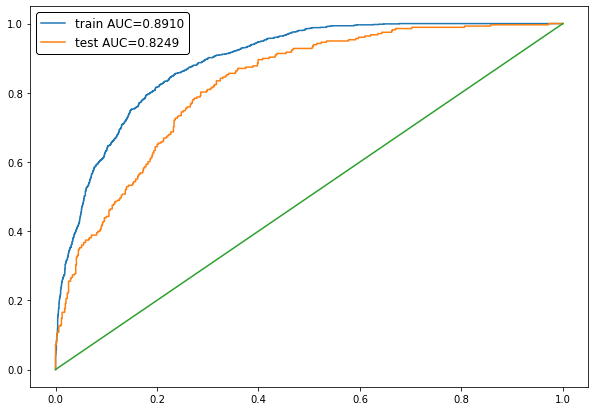

In [64]:
train_auc = roc_auc_score(y_train, forest_new_proba_train)
test_auc = roc_auc_score(y_val, forest_new_proba_val)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train,forest_new_proba_train)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_val, forest_new_proba_val)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))

Результат улучшить не удалось test AUC = 0.8249

Применим градиентный бустинг

In [37]:
boosting_model = CatBoostClassifier(n_estimators=200, cat_features=categorical_columns)

In [38]:
boosting_model.fit(X_train, y_train)

Learning rate set to 0.083391
0:	learn: 0.6382749	total: 241ms	remaining: 48.1s
1:	learn: 0.5970973	total: 265ms	remaining: 26.3s
2:	learn: 0.5610080	total: 295ms	remaining: 19.4s
3:	learn: 0.5329491	total: 323ms	remaining: 15.8s
4:	learn: 0.5112068	total: 352ms	remaining: 13.7s
5:	learn: 0.4930985	total: 379ms	remaining: 12.3s
6:	learn: 0.4800850	total: 403ms	remaining: 11.1s
7:	learn: 0.4681540	total: 431ms	remaining: 10.3s
8:	learn: 0.4583285	total: 460ms	remaining: 9.77s
9:	learn: 0.4494858	total: 490ms	remaining: 9.31s
10:	learn: 0.4439489	total: 515ms	remaining: 8.85s
11:	learn: 0.4371125	total: 544ms	remaining: 8.53s
12:	learn: 0.4311122	total: 575ms	remaining: 8.27s
13:	learn: 0.4264039	total: 604ms	remaining: 8.02s
14:	learn: 0.4222915	total: 632ms	remaining: 7.8s
15:	learn: 0.4190003	total: 661ms	remaining: 7.6s
16:	learn: 0.4153313	total: 690ms	remaining: 7.42s
17:	learn: 0.4132986	total: 717ms	remaining: 7.25s
18:	learn: 0.4116653	total: 745ms	remaining: 7.09s
19:	learn: 0.

In [39]:
cat_proba_train = boosting_model.predict_proba(X_train)[:, 1]
cat_proba_val = boosting_model.predict_proba(X_val)[:, 1]

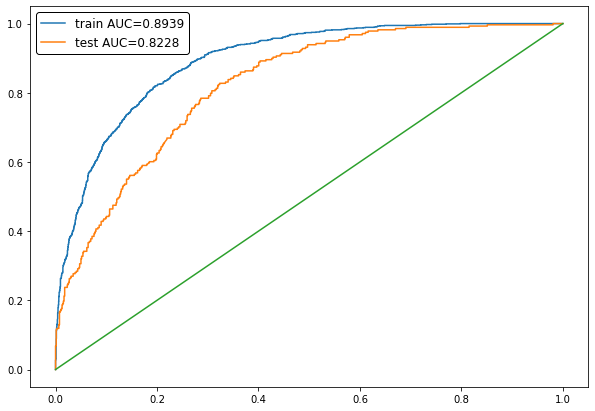

In [42]:
train_auc = roc_auc_score(y_train, cat_proba_train)
test_auc = roc_auc_score(y_val, cat_proba_val)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, cat_proba_train)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_val, cat_proba_val)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))


На тесте опять получили не самый лучший результат test AUC = 0.8228. Подберем гиперпараметры: learning rate и количество деревьев

In [43]:
catboost_model_new = CatBoostClassifier(random_state=1234)

In [44]:
parameters = {'learning_rate': [.3, .2, .1],
             'iterations': [50, 100, 200]}

In [45]:
grid_search_catboost = GridSearchCV(catboost_model_new, parameters, cv=5, scoring='roc_auc')

grid_search_catboost.fit(X_train, y_train, cat_features=categorical_columns, verbose=False)

print(grid_search_catboost.best_params_)
print(grid_search_catboost.best_score_)

{'iterations': 50, 'learning_rate': 0.2}
0.849201291792743


In [46]:
cat_proba_train_new = grid_search_catboost.predict_proba(X_train)[:, 1]
cat_proba_val_new = grid_search_catboost.predict_proba(X_val)[:, 1]

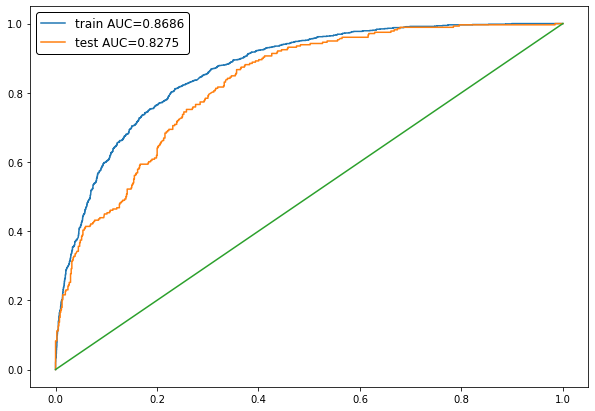

In [47]:
train_auc = roc_auc_score(y_train, cat_proba_train_new)
test_auc = roc_auc_score(y_val, cat_proba_val_new)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, cat_proba_train_new)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_val, cat_proba_val_new)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))

На тесте получили опять не самое лучшее предсказание test AUC = 0.8275. Попробуем подобрать и другие параметры 

In [55]:
boost_model_new = CatBoostClassifier(loss_function = 'Logloss',
                                     cat_features=categorical_columns,
                                     bootstrap_type = 'Bayesian',
                                     random_seed = 10,
                                     verbose=False,
                                     eval_metric = 'AUC:hints=skip_train~false',
                                     bagging_temperature=1)

In [56]:
catboost_final = boost_model_new.grid_search({'max_depth': [4],
                                                  'learning_rate': np.linspace(0.01, 0.1, 20),
                                                  'l2_leaf_reg': [1],
                                                  'iterations'    : [200, 300],
                                                  'random_strength': [2,5]},
                                             X_train,
                                             y_train,
                                             cv=5)


bestTest = 0.8335525937
bestIteration = 184

0:	loss: 0.8335526	best: 0.8335526 (0)	total: 3.68s	remaining: 4m 50s

bestTest = 0.8335346216
bestIteration = 199

1:	loss: 0.8335346	best: 0.8335526 (0)	total: 7.46s	remaining: 4m 50s

bestTest = 0.8335597826
bestIteration = 198

2:	loss: 0.8335598	best: 0.8335598 (2)	total: 11.6s	remaining: 4m 58s

bestTest = 0.8364640844
bestIteration = 198

3:	loss: 0.8364641	best: 0.8364641 (3)	total: 15.3s	remaining: 4m 50s

bestTest = 0.8374992811
bestIteration = 199

4:	loss: 0.8374993	best: 0.8374993 (4)	total: 18.9s	remaining: 4m 43s

bestTest = 0.838336784
bestIteration = 199

5:	loss: 0.8383368	best: 0.8383368 (5)	total: 22.8s	remaining: 4m 41s

bestTest = 0.8378838854
bestIteration = 185

6:	loss: 0.8378839	best: 0.8383368 (5)	total: 26.4s	remaining: 4m 35s

bestTest = 0.8394223027
bestIteration = 194

7:	loss: 0.8394223	best: 0.8394223 (7)	total: 30s	remaining: 4m 30s

bestTest = 0.8400369508
bestIteration = 199

8:	loss: 0.8400370	best: 0.84

In [57]:
catboost_final['params']

{'random_strength': 5,
 'depth': 4,
 'l2_leaf_reg': 1,
 'iterations': 200,
 'learning_rate': 0.08578947368421053}

In [58]:
best_catboost_model = CatBoostClassifier(random_strength=5,
                                         depth=4,
                                         l2_leaf_reg=1,
                                         iterations=200,
                                         eval_metric='AUC:hints=skip_train~false',
                                         learning_rate=0.08578947368421053,
                                         cat_features=categorical_columns,
                                         random_seed=10)

In [59]:
best_catboost_model.fit(X_train, y_train, cat_features=categorical_columns, verbose=False)

In [60]:
final_proba_train_new = best_catboost_model.predict_proba(X_train)[:, 1]
final_proba_val_new = best_catboost_model.predict_proba(X_val)[:, 1]

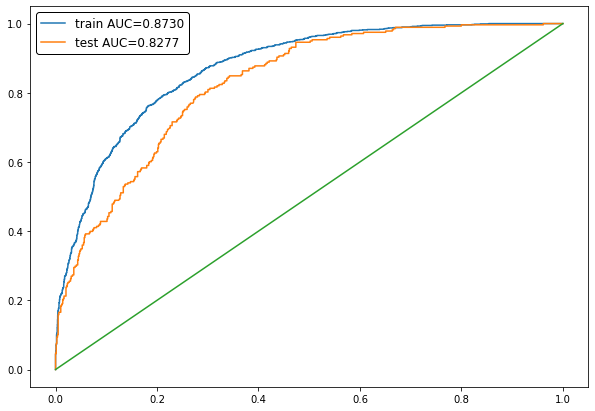

In [61]:
train_auc = roc_auc_score(y_train, final_proba_train_new)
test_auc = roc_auc_score(y_val, final_proba_val_new)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, final_proba_train_new)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_val, final_proba_val_new)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))

Результат улучшился всего на две десятитысячных, но возьмем эту модель как самую лучшую.

In [67]:
best_model = best_catboost_model

In [62]:
submission = pd.read_csv(r"C:\Users\user\Downloads\submission.csv")

In [68]:
submission['Churn'] = best_model.predict_proba(test_data)[:, 1]

In [70]:
submission.to_csv('my_submission.csv', index=False)

In [72]:
submission.head()

,Id,Churn
0,0,0.039337
1,1,0.700427
2,2,0.677258
3,3,0.015681
4,4,0.003269


На Kaggle получился score: 0.85244